# Proyecto 1:  Red neuronal perceptrón multicapa para resolver la clasificación de imágenes por forma y por color.
Alumna: Ovando Becerril Ericka Deyanira

Para esta tarea se útiliza SKLearn.

Se declaran las librerias:

In [143]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as img
from PIL import Image,ImageOps
from sklearn.metrics import accuracy_score
%matplotlib inline 
import skimage as ski  #manejo de imagenes 
from skimage import data, io, filters

La imagen original a procesar para el entrenamiento del perceptron multicapa es: 

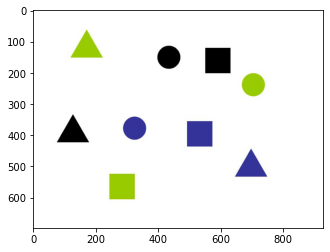

In [2]:
plt.imshow(img.imread('fig.jpg'))
plt.show()

Las imagenes que obtenemos despues de seccionar la imagen original es:

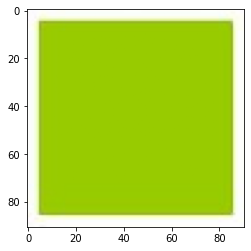

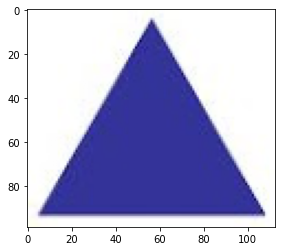

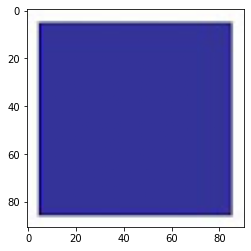

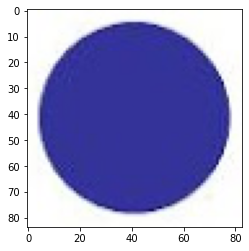

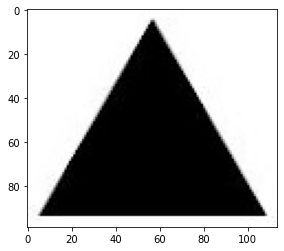

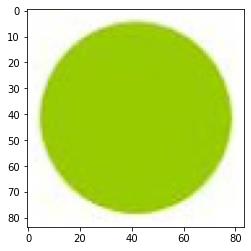

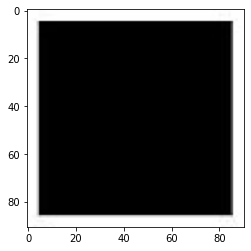

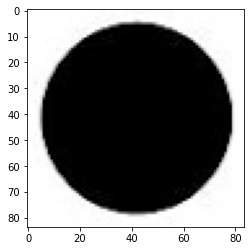

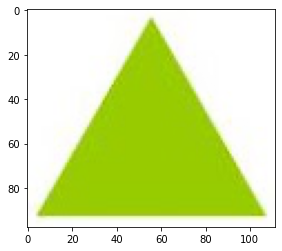

In [3]:
ROI_number=0
for i in range (9):
    plt.imshow(img.imread('ROI_{}.png'.format(ROI_number)))
    plt.show()
    ROI_number += 1

# Para los datos de prueba:

La imagen para las figuras de prueba es:

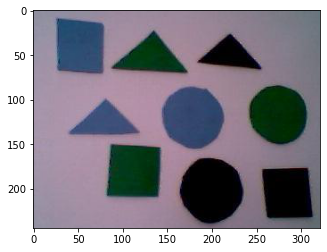

In [4]:
plt.imshow(img.imread('foto.jpg'))
plt.show()

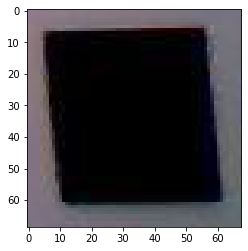

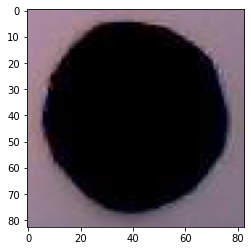

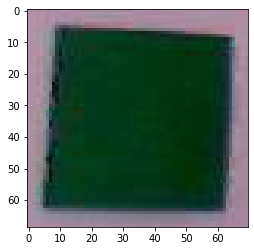

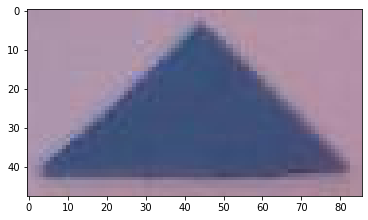

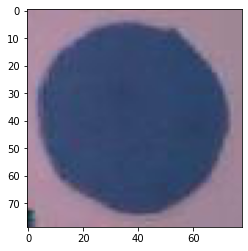

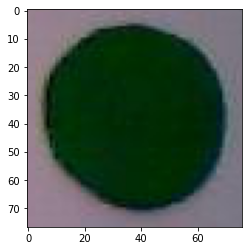

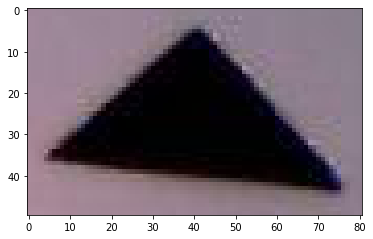

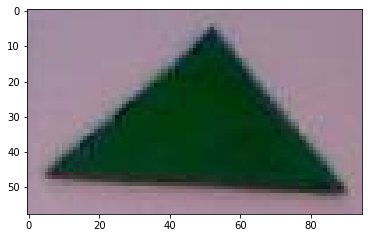

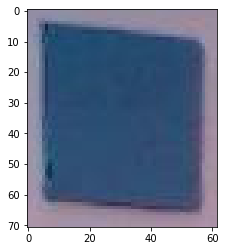

In [5]:
TS_number = 0
for i in range(9):
    plt.imshow(img.imread('TS_{}.png'.format(TS_number)))
    plt.show()
    TS_number+=1

# Ordenamos los datos para el aprendizaje supervisado:

para el color: verde=[1,0,0]; azul=[0, 1, 0], negro= [0 ,0, 1]

para las figuras: circulo=[1,0,0]; cuadrado=[0, 1, 0], triangulo= [0 ,0, 1]

In [6]:
train_color=[
    [1, 0, 0],
    [0, 1, 0],
    [0, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0],
    [0, 0, 1],
    [0, 0, 1],
    [1, 0, 0],]

train_figura=[
    [0, 1, 0],
    [0 ,0, 1],
    [0, 1, 0],
    [1, 0, 0],
    [0 ,0, 1],
    [1, 0, 0],
    [0, 1, 0],
    [1, 0, 0],
    [0 ,0, 1]
]

In [7]:
taste_color=[
    [0, 0, 1],
    [0, 0, 1],
    [1, 0, 0],
    [0, 1, 0],
    [0, 1, 0],
    [1, 0, 0],
    [0, 0, 1],
    [1, 0, 0],
    [0, 1, 0],
    ]

taste_figura=[
    [0, 1, 0],
    [1 ,0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1 ,0, 0],
    [1, 0, 0],
    [0, 0, 1],
    [0, 0, 1],
    [0 ,1, 0],
    ]

Para detectar el color se propone obtener el RGB del centro de cada imagen. 

In [8]:
def getColor(picture): #obtener RGB de la figura
    img= cv2.imread(picture)
    b, g, r = cv2.split(img)
    x=round(np.shape(b)[0]/2)
    y=round(np.shape(b)[1]/2)
    RGB=[g[x, y],b[x,y], r[x,y]]
    return RGB


Obtenemos el vector de entrada, segun el RGB de las figuras de entrenamiento.

In [9]:
ROI_number=0
x_trainColors=[]
for i in range (9):
    num=getColor('ROI_{}.png'.format(ROI_number))
    x_trainColors.append(num)
    ROI_number += 1
x_trainColors

[[203, 0, 152],
 [51, 153, 52],
 [51, 153, 52],
 [51, 153, 52],
 [0, 0, 0],
 [203, 0, 152],
 [0, 0, 0],
 [0, 0, 0],
 [203, 0, 152]]

In [10]:
TS_number = 0
x_tasteColors=[]
for i in range(9):
    num=getColor('TS_{}.png'.format(TS_number))
    x_tasteColors.append(num)
    TS_number += 1
x_tasteColors

[[0, 0, 0],
 [0, 0, 0],
 [57, 16, 0],
 [78, 121, 63],
 [70, 110, 51],
 [39, 3, 0],
 [2, 0, 1],
 [58, 14, 0],
 [77, 114, 43]]

# Clasificador de color

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

In [82]:
clfcolor = MLPClassifier(solver='lbfgs', alpha=1e-6,
                  hidden_layer_sizes=(10, 6))

Ajustar el modelo

In [83]:
clfcolor.fit(x_trainColors, train_color)

MLPClassifier(alpha=1e-06, hidden_layer_sizes=(10, 6), solver='lbfgs')

In [84]:
pred = clfcolor.predict(x_tasteColors) #AL EVALUAR 

In [85]:
from sklearn.neural_network import MLPClassifier

In [86]:
def ClassDetector(onehot):
    output=[]
    for caso in onehot:
        output.append(np.argmax(caso))
    return output

In [87]:
predclass=ClassDetector(pred)
yclass=ClassDetector(taste_color)
print("predclass",predclass)
print("yclass",yclass)

predclass [2, 2, 0, 1, 1, 0, 0, 0, 1]
yclass [2, 2, 0, 1, 1, 0, 2, 0, 1]


In [88]:
#plt.imshow(img.imread('TS_8.png'))
#plt.show()

In [89]:
accuracy_score(predclass, yclass)
#print(accuracy_score(predclass,yclass)) 

0.8888888888888888

In [60]:
print(confusion_matrix(predclass,yclass))


[[0 3 0]
 [0 0 0]
 [3 0 3]]


# Conclusión primera parte

El desempeño del clasificador fue muy bueno, por ahora, marca una accuracy de 1.0. Sin embargo como se ha comentado en clase, la accuracy puede variar, hasta el momento se han obtenido resultados entre .6 y 1.0. A manera de conclusión considero que la deteccion del contorno de las figuras y recortarlas para guardarlas en un uevo archivo permitió tener mas control sobre las eqtiquetas. Por otro lado, el detectar el valor RGB del centro de cada figura y tomar este valor como referencia para la clasificación tambien resultó una buena opción para esta tarea. Sin embargo, considero que tanto el proceso de entrenamiento como de testing es muy pequeño y para poder evaluar realmente los resultados será necesario más imagenes para ambos procesos como trabajo a futuro. 

# Clasificador de figuras

Se convierten las imagenes del entrenamiento a blanco y negro y se considera utilizar el numero de esquinas cómo descriptor. Para esta tarea se utiliza el metodo Shi-Tomasi en Open CV.

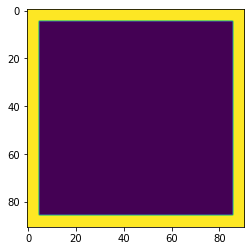

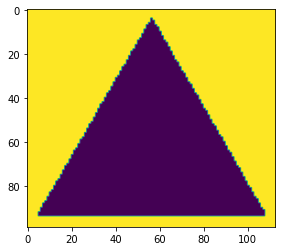

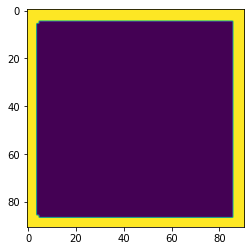

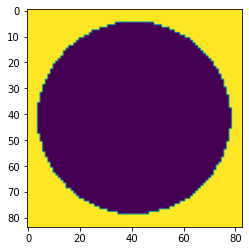

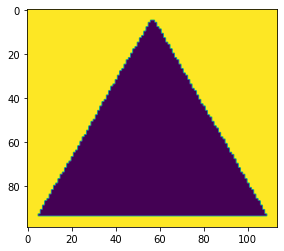

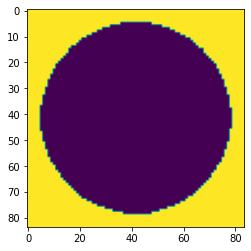

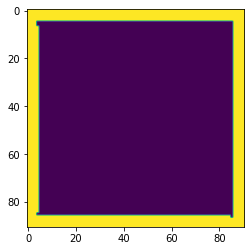

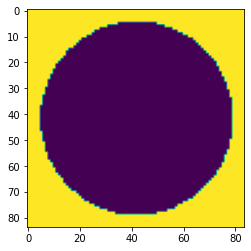

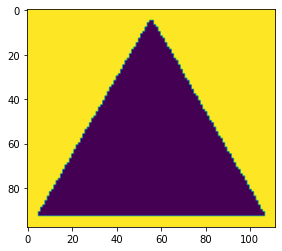

[array([1.4380814, 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       ]),
 array([ 3.60951651e-01,  1.13693906e-02,  1.63234924e-04,  1.74053635e-03,
        -9.27718203e-07, -1.85515483e-04, -7.73823789e-09]),
 array([ 1.59749132e+00,  5.14157513e-05,  4.20439529e-06,  1.81270657e-02,
         1.90550594e-06, -1.29973984e-04,  4.62731352e-06]),
 array([ 7.33376534e-01,  2.81563522e-04,  3.71424784e-08,  1.42889460e-05,
        -2.73577522e-12, -1.30097575e-07, -1.00437120e-11]),
 array([ 3.59590435e-01,  1.18183737e-02,  1.89070638e-04,  1.65083885e-03,
        -9.22269212e-07, -1.79459847e-04,  6.66884077e-09]),
 array([ 6.85721534e-01,  3.07202566e-06,  2.78628308e-07,  6.38736474e-06,
         6.50270389e-12, -9.82355309e-09, -5.50670780e-12]),
 array([ 1.44036213e+00,  4.84627072e-06,  3.75495309e-06,  1.34009945e-06,
         3.00456712e-12, -8.82329390e-11,  9.69321542e-14]),
 array([ 7.14804333e-01,  4.36229582e-06,  5.04193689e-07,  6.11287624e-05,
       

In [437]:
ROI_number=0
momentos_train=[]
for i in range (9):
    im = cv2.imread('ROI_{}.png'.format(ROI_number),cv2.IMREAD_GRAYSCALE)
    #im= cv2. cvtColor(im, cv2. COLOR_BGR2GRAY)
    _,ima = cv2.threshold(im, 200,300, cv2.THRESH_BINARY)
    #moment = cv2.moments(ima)
   
    #huMoments = (cv2.HuMoments(moment))
    #huMoments= huMoments.flatten().tolist()
    #print(np.size(huMoments))
    label_image=ski.measure.label(ima)
    regions = ski.measure.regionprops(label_image) #obtenemos las caracteristicas de las imagenes 
    plt.imshow(ima)
    plt.show()
    momento =regions[0].moments_hu #obtenemos los momentos hu
    #momentos_train.append(huMoments)
    momentos_train.append(momento)
    ROI_number += 1
    
momentos_train

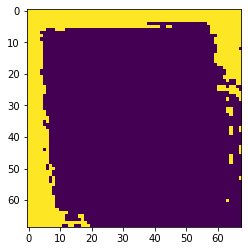

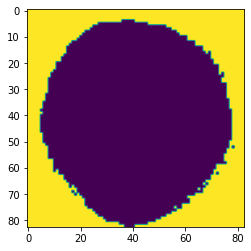

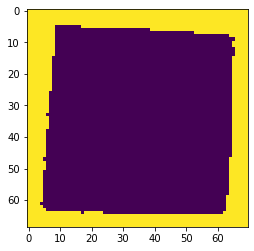

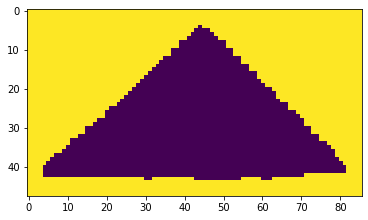

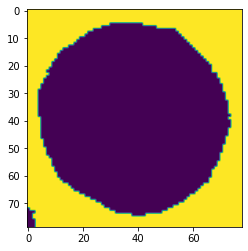

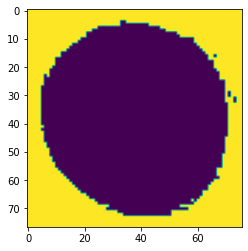

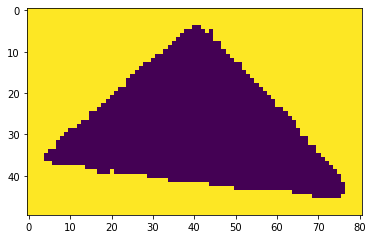

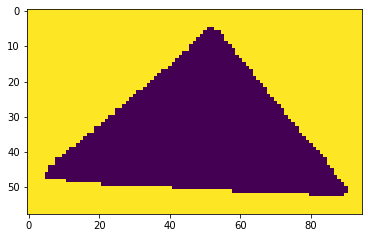

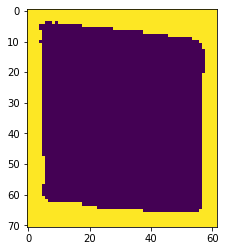

[array([ 1.17294693e+00,  3.60351187e-01,  8.45237272e-01,  8.00242249e-02,
        -2.07814578e-02, -4.79482275e-02,  1.13390834e-03]),
 array([ 7.51439867e-01,  1.21067460e-03,  3.45066578e-04,  5.37993182e-04,
        -2.00325711e-07, -1.85833644e-05,  1.16626047e-07]),
 array([ 9.26193159e-01,  1.46532268e-03,  3.14525140e-04,  8.70379497e-03,
         1.41274773e-05, -1.14554866e-04, -2.79307833e-06]),
 array([ 4.27798061e-01,  6.13509637e-02,  3.04646861e-04,  7.35417208e-04,
        -2.40874698e-07, -1.27963138e-04,  2.51297048e-07]),
 array([ 7.04175237e-01,  2.25036820e-04,  1.78108533e-05,  1.61598243e-04,
         8.49803722e-09, -2.31042143e-06, -1.71601954e-09]),
 array([ 7.14169536e-01,  6.92719321e-04,  1.32543067e-04,  3.53225388e-04,
         7.39399324e-08, -5.87689667e-06,  1.93450231e-08]),
 array([ 4.01056476e-01,  3.46679831e-02,  2.48190898e-04,  2.49546176e-04,
        -3.71333546e-08, -4.04340784e-05, -4.97796746e-08]),
 array([ 3.93393716e-01,  3.80789898e-02,

In [438]:
TS_number=0
momentos_taste=[]
for i in range (9):
    im = cv2.imread('TS_{}.png'.format(TS_number),cv2.IMREAD_GRAYSCALE)
    #im= cv2. cvtColor(im, cv2. COLOR_BGR2GRAY)
    _,ima = cv2.threshold(im, 110,255, cv2.THRESH_BINARY)
    #moment = cv2.moments(ima)
   
    #huMoments = (cv2.HuMoments(moment))
    #huMoments= huMoments.flatten().tolist()
    #print(huMoments)
    label_image=ski.measure.label(ima)
    regions = ski.measure.regionprops(label_image) #obtenemos las caracteristicas de las imagenes 
    plt.imshow(ima)
    #momentos_taste.append(huMoments)
    momento =regions[0].moments_hu #obtenemos los momentos hu
    momentos_taste.append(momento)
    plt.show()
    TS_number += 1
    
momentos_taste

# Ajustar el modelo 

In [439]:
#clforma = MLPClassifier(solver='lbfgs', alpha=1e-2,
#                  hidden_layer_sizes=(10, 6))

clforma1 = MLPClassifier(solver='lbfgs', alpha=0.01,
                  hidden_layer_sizes=(7, 2))

In [440]:
clforma1.fit(momentos_train,train_figura)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(7, 2), solver='lbfgs')

In [441]:
pred1 = clforma.predict(momentos_taste)

Evaluar modelo:

In [442]:
predclass1=ClassDetector(pred1)
yclass1=ClassDetector(taste_figura)
print(predclass1)
print(yclass1)

[1, 0, 0, 2, 0, 0, 2, 2, 0]
[1, 0, 1, 2, 0, 0, 2, 2, 1]


In [445]:
print(accuracy_score(predclass1,yclass1)) 

0.7777777777777778


In [444]:
print(confusion_matrix(predclass1,yclass1))

[[3 2 0]
 [0 1 0]
 [0 0 3]]


# Conclusión segunda parte

A manera de conclusión de esta segunda sección, se puede considerar que se obtuvo un buen resulado en la clasificación con un accuracy de 0.77. Al igual que en la clasificación de colores considero que el dataset es muy pequeño y la prueba de testeo tambien. Sin embargo despues del preprocesamiento de los datos se puede obtener un buen resultado y podemos suponer que en un ejercio a gran escala los resultados a obtener serian buenos.  

# Conclusión

Entre algunos puntos a resaltar de esta tarea, se encuentra que para trabajar con modelos de ML como en este ejemplo, se debe considerar particlarmente:

1) el preprocesamiento de los datos.

2) La importancia de las etiquetas, que en este caso se realizó de manera manual pero que en un ejercicio con un dataset mas extenso resulta poco practico.

3) La suceptivilidad del programa por la misma aleatoriedad de las conexiones entre las capas del perceptrón por lo que no siempre se obtiene el mismo accuracy a pesar de tener los mismos datos. 

Finalmente a titulo de obseración es importante resaltar la facilidad de implmentación con sklearn, la importancia de conocer las diversas herramientas disponibles.